#Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing data set

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


this data set contains the detail of all wine and contain only numeric data

Data Cleaning and Checking

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#checking the dimention of dataset
df.shape

(1338, 7)

In [5]:
#checking the column of dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [7]:
#checking the types of column of dataset
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are float,object and int64 value we have seen

In [8]:
#checking the null value of  column of dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values we will also check it by using heatmap

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


since there are object datatypes that must be converted to numerical values

<Axes: >

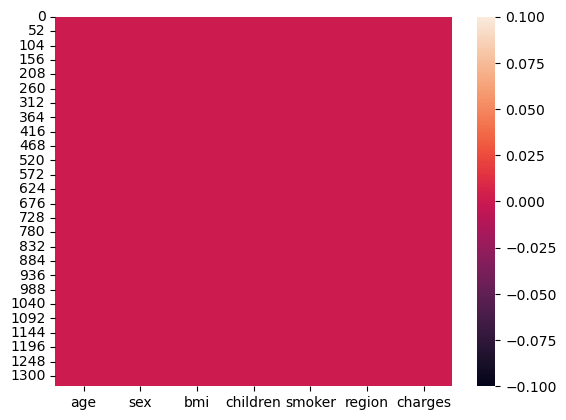

In [10]:
sns.heatmap(df.isnull())

heat map also shows that there no null value present, we find there are no null values and all datatypes seem to be right 

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [13]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

These are the value counts of all columns and we have seen there is no white space are present

In [14]:
#checking the list of counts of target
df["charges"].unique()
    

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

These are six categories present in target

In [15]:
df["charges"].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

These are six different categories present in target eight is best quality out of all wine

In [16]:
#checking the categorical& numericavalue of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

        

Categorical columns: ['sex', 'smoker', 'region']


Numerical columns: ['age', 'bmi', 'children', 'charges']


There are no categorial data present all are numerical column

# Description of data set

In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This gives the all statical information of the numerical columns.There is no negative or 
invalid value is present hence we can say that it is perfect
we can obserbe these points:
1.The counts of all columns are same it means there is no missing value in any column
2.The mean value is appox equal to median(50%) in all columns which means the data is not skewed in  these columns
3.There is no any columns in which mean value is less than median(50%) hence there no right skewed
4.There is major difference beteen 75% and max in 
age	and	bmi	 it means the	outliers are present in both columns
5.In this discription min,std and 25% ditail also found

# Data visualization

univariate analysis

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


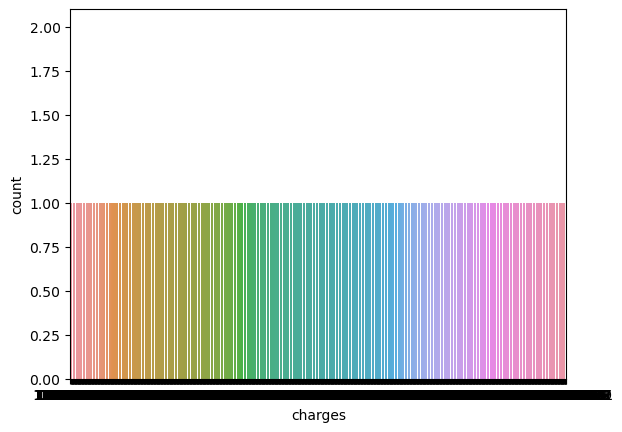

In [18]:
#visualizing the no of quality wine
ax=sns.countplot(x='charges',data=df)
print(df['charges'].value_counts())

We observed that the count of charges are equal 

In [19]:
#Check correlation

In [20]:
correlations = df.corr()['charges'].sort_values(ascending=False)
print(correlations)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


<Axes: >

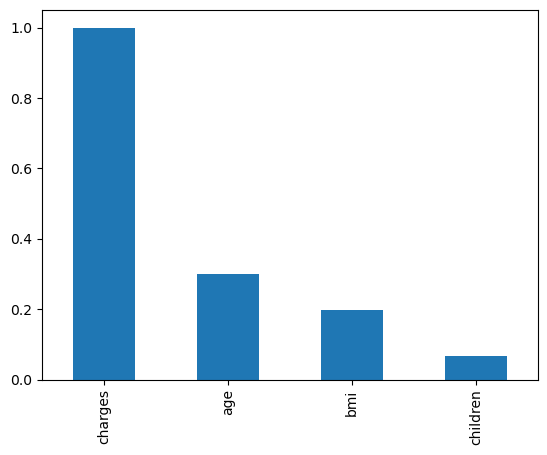

In [21]:
correlations.plot(kind='bar')

From this barplot we can observe, some obvious feature correlations such as residual sugar,free sulfur dioxide and pH
are less correlated this barplot show value between +4.5 to -4.5

<Axes: >

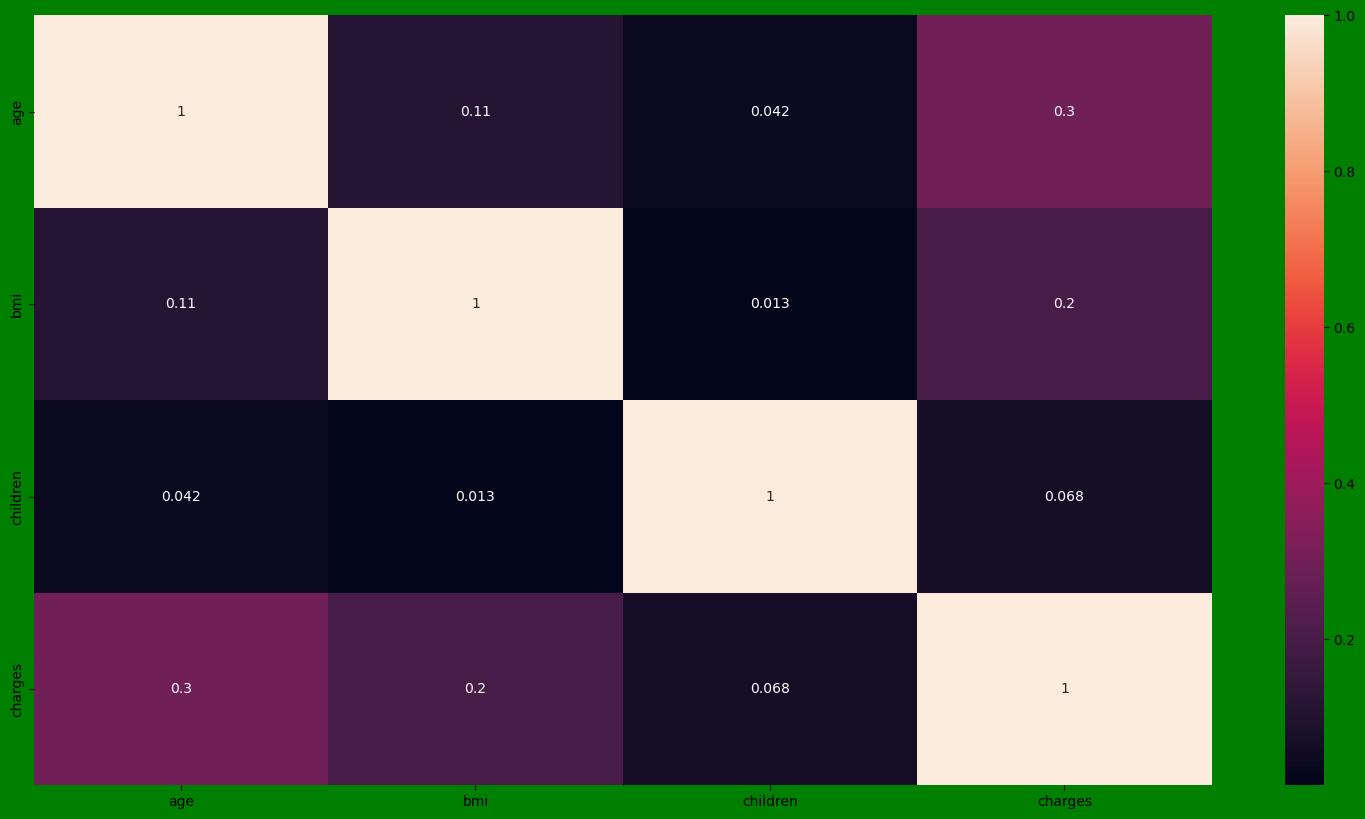

In [23]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)


From this heatmap we can observe, some obvious feature correlations such as age and children . Apart from that, we get to
know the percentage of the correlations we obtained before.We can also observe that approximately all of these features 
correlate positively with charges .

In [24]:
print(abs(correlations) > 0.2)

charges      True
age          True
bmi         False
children    False
Name: charges, dtype: bool


From all the values, we are selecting bmi, children in order to study them 
better and see the distribution of values that separate the different charges.

The above image reveals that how that data is easily distributed on features.

male      676
female    662
Name: sex, dtype: int64


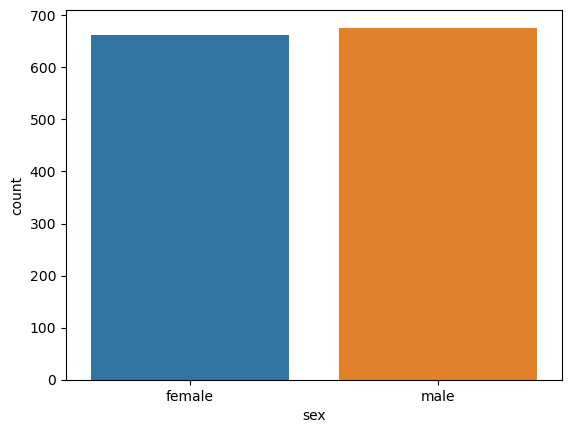

In [27]:
# visualising the count of sex
print(df['sex'].value_counts())
ax= sns.countplot(x='sex', data=df)
plt.show()

we observe male and female are equal in count

no     1064
yes     274
Name: smoker, dtype: int64


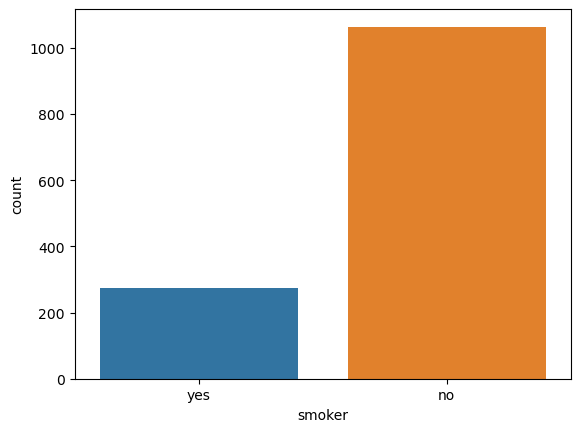

In [28]:
# visualising the count of smoker
print(df['smoker'].value_counts())
ax= sns.countplot(x='smoker', data=df)
plt.show()

we observe the no of smoker is less than non smoker

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


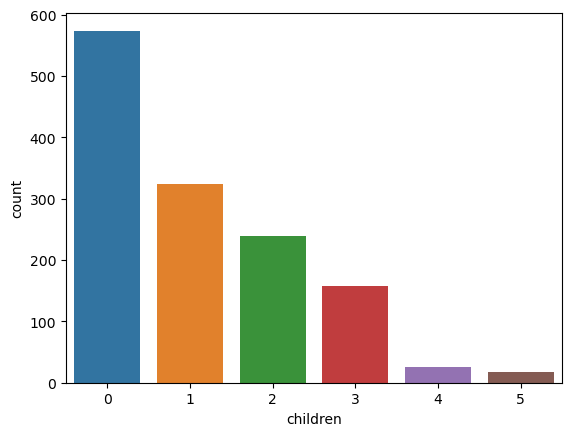

In [29]:
# visualising the count of children
print(df['children'].value_counts())
ax= sns.countplot(x='children', data=df)
plt.show()

In [ ]:
most pobably have no children or 1,2 or 3 children less have more than 3 children

In [30]:
#checking skewness
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

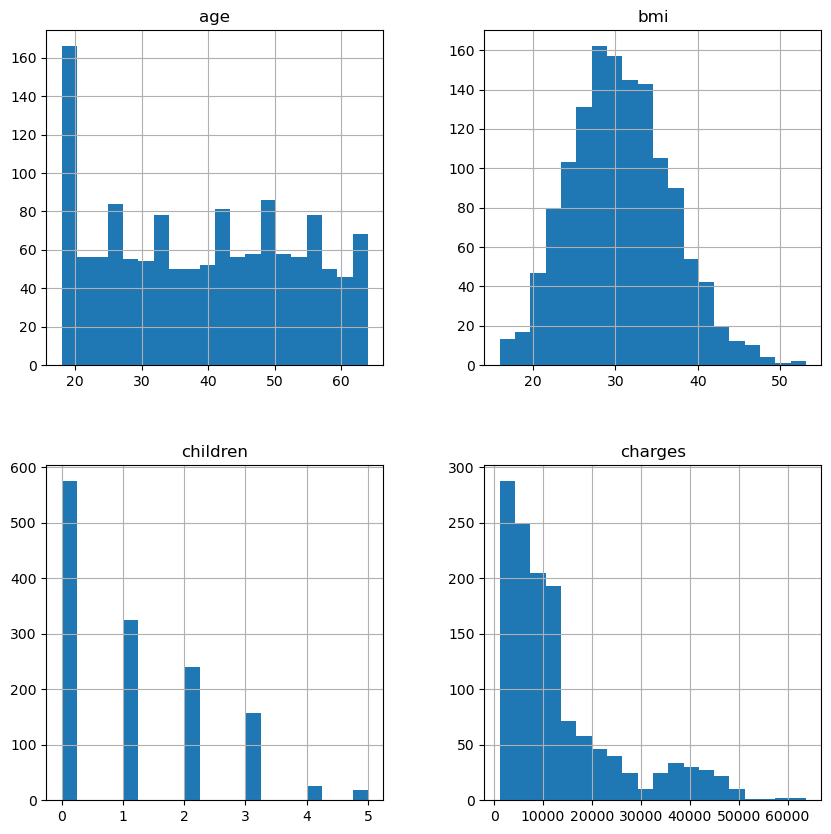

In [31]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

we observe skewness is present

# Feature Selection

Now that we have already studied our dataset through histograms and different graphics it's time to select 
some features we will use in our machine learning algorithms

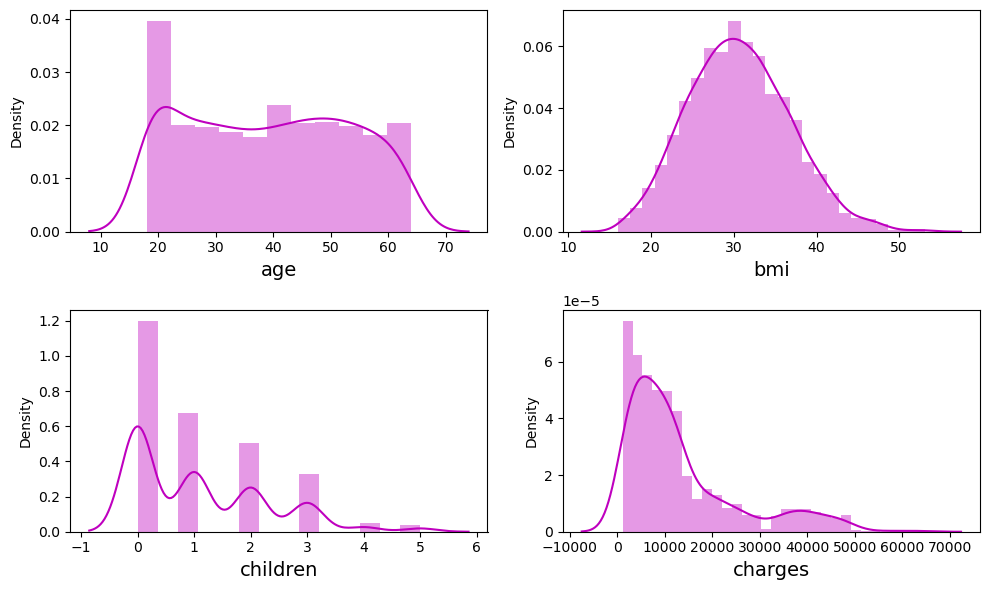

In [33]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we observe data is left side skew

# Remove skewness

In [34]:
df['age']=np.cbrt(df['age'])

In [35]:
df['bmi']=np.cbrt(df['bmi'])

In [36]:
df['children']=np.cbrt(df['children'])

In [37]:
#checking skewness
df.skew()

age        -0.228740
bmi        -0.075765
children   -0.097116
charges     1.515880
dtype: float64

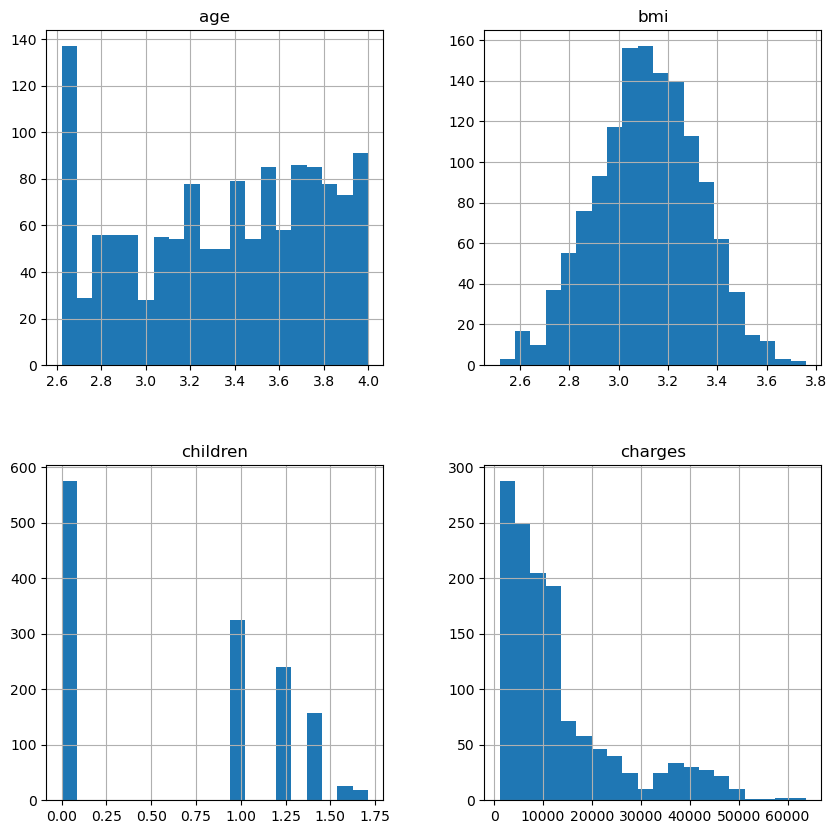

In [38]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

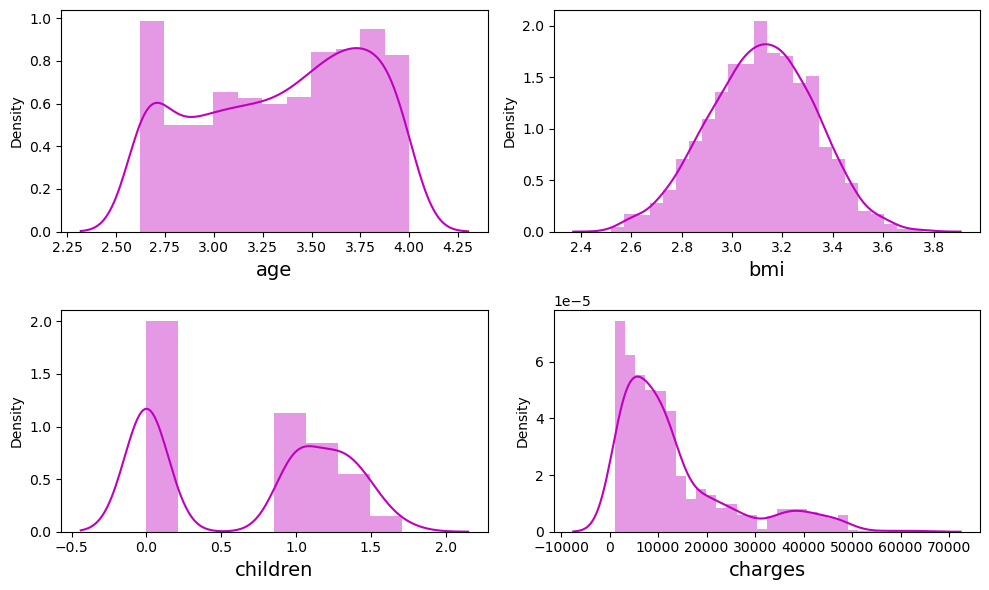

In [39]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we observe skewness is removed dfeatures are normaly distributed

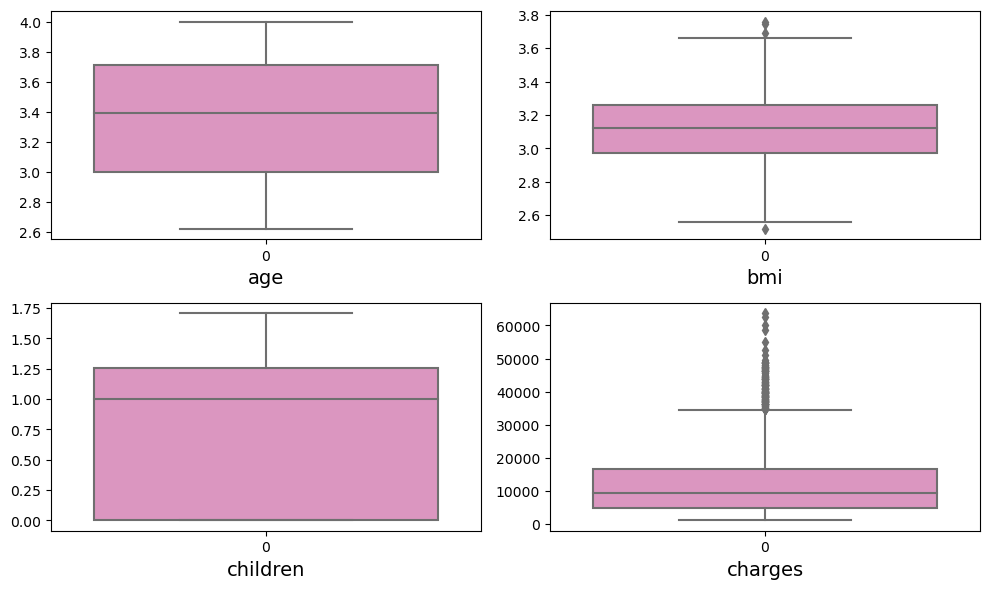

In [40]:
#checking for outliers
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

no outliers are present accept in bmi

# visualising correlation with target to other value

In [41]:
correlations = df.corr()['charges'].sort_values(ascending=False)
print(correlations)

charges     1.000000
age         0.293828
bmi         0.199471
children    0.072756
Name: charges, dtype: float64


In [42]:
cor=df.corr()
cor

,age,bmi,children,charges
age,1.000000,0.109873,0.088084,0.293828
bmi,0.109873,1.000000,0.016078,0.199471
children,0.088084,0.016078,1.000000,0.072756
charges,0.293828,0.199471,0.072756,1.000000


this shows corellation between target and other values

<Axes: >

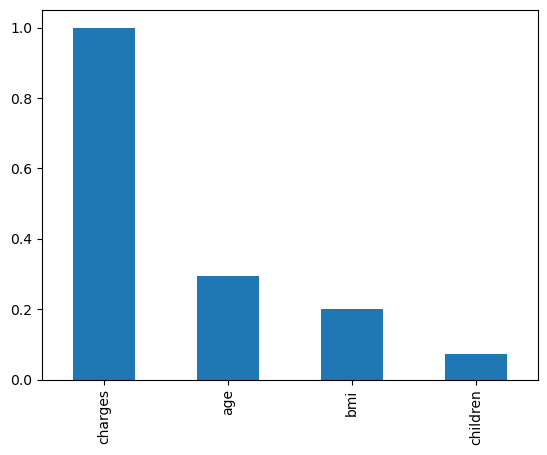

In [43]:
correlations.plot(kind='bar')

all are correlated but not in high amount

<Axes: >

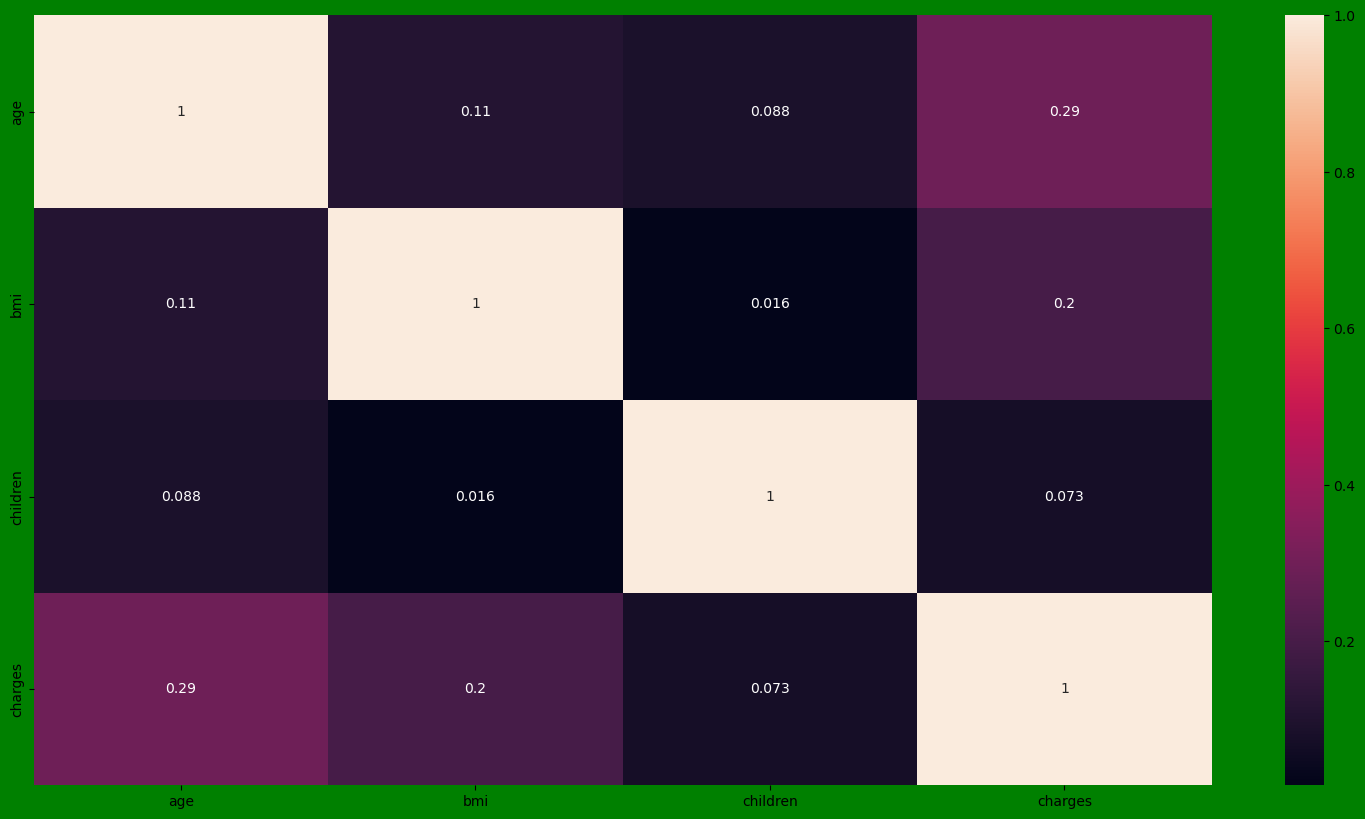

In [44]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

all features are positively correlated

In [57]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [60]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int32

In [61]:
le=LabelEncoder()
df['smoker']=le.fit_transform(df['smoker'])
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [62]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32

In [63]:
df

,age,sex,bmi,children,smoker,region,charges
0,2.668402,0,3.032970,0.00000,1,3,16884.92400
1,2.620741,1,3.232290,1.00000,0,2,1725.55230
2,3.036589,1,3.207534,1.44225,0,2,4449.46200
3,3.207534,1,2.831656,0.00000,0,1,21984.47061
4,3.174802,1,3.068073,0.00000,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,3.684031,1,3.140367,1.44225,0,1,10600.54830
1334,2.620741,0,3.172154,0.00000,0,0,2205.98080
1335,2.620741,0,3.327713,0.00000,0,2,1629.83350
1336,2.758924,0,2.954880,0.00000,0,3,2007.94500


# Separating feature and target

In [64]:
x=df.drop("charges", axis= 1)
y=df["charges"]

# Feature Scaling using Standard Scalarization

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.594604,-1.010519,-0.398415,-1.117604,1.970587,1.343905
1,-1.706970,0.989591,0.557001,0.502009,-0.507463,0.438495
2,-0.726554,0.989591,0.438337,1.218282,-0.507463,0.438495
3,-0.323527,0.989591,-1.363383,-1.117604,-0.507463,-0.466915
4,-0.400698,0.989591,-0.230150,-1.117604,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.799878,0.989591,0.116379,1.218282,-0.507463,-0.466915
1334,-1.706970,-1.010519,0.268747,-1.117604,-0.507463,-1.372326
1335,-1.706970,-1.010519,1.014395,-1.117604,-0.507463,0.438495
1336,-1.381185,-1.010519,-0.772725,-1.117604,-0.507463,1.343905


# checking variance inflation Factor(vif)

In [66]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values, i)
                    for i in range (len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.021490,age
1,1.008888,sex
2,1.041105,bmi
3,1.008517,children
4,1.006494,smoker
5,1.026286,region


we observe by checking vif values the feature causing multicollineraity problem. in no any one have vif is more than 10 so no need to drop any feature.and there no multicollineraity problem 

In [67]:
y.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

here we observe that data is not balanced so due to classification problem we balance it by oversampling method

# MODELLING

Finding the best random state

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [75]:
maxAccu = 0
maxRS = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 142)
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxAccu:
        maxAccu = acc
        maxRS  = 142
print("Best accuracy is =",  maxAccu, "at random_state ", maxRS) 

ValueError: Unknown label type: 'continuous'

# creat train test split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 142)

# classification algorithms

In [78]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [79]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC= RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC))

ValueError: Unknown label type: 'continuous'